#### Histograms

##### Plotting a histogram of iris data
For the exercises in this section, you will use a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, Iris setosa, Iris versicolor, and Iris virginica. The full data set is available as part of scikit-learn. Here, you will work with his measurements of petal length.

Plot a histogram of the petal lengths of his 50 samples of Iris versicolor using matplotlib/seaborn's default settings. Recall that to specify the default seaborn style, you can use sns.set(), where sns is the alias that seaborn is imported as.

In [1]:
#Import plotting modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set default Seaborn style
sns.set()

In [3]:
versicolor_petal_length = np.array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

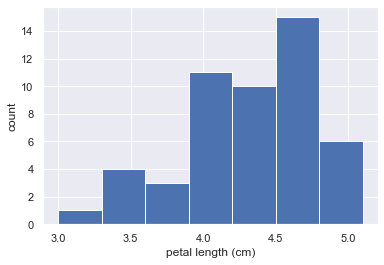

In [4]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)


# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)


# Convert number of bins to integer: n_bins
n_bins = int(n_bins)


# Plot the histogram
_= plt.hist(versicolor_petal_length, bins = n_bins)


# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

#### Making a Bee Swarm Plot
##### Binning bias
Binning bias; you might interpret your plot differently for two different choices of bin number. An additional problem with histograms is that we are not plotting all of the data. We are sweeping the data into bins, and losing their actual values.
To remedy these problems we can make a bee swarm plot, also called a swarm plot.

In [5]:
#Loading iris data into a variable called iris 
iris = datasets.load_iris()

In [6]:
#Creating a dataFrame of the iris data
X = iris.data
y = iris.target_names
iris_dataset = pd.DataFrame(X,  columns = iris.feature_names)
iris_dataset['species'] = iris.target

In [7]:
print(y)

['setosa' 'versicolor' 'virginica']


In [8]:
print(iris_dataset.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [9]:
# Changing 0, 1 , 2 in species column to match names of species(0: 'setosa', 1: 'versicolor', 2 : 'virginica')
species_mapper = {0 : y[0], 1 : y[1], 2 : y[2]}
iris_dataset['species'] = iris_dataset['species'].map(species_mapper)

In [10]:
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


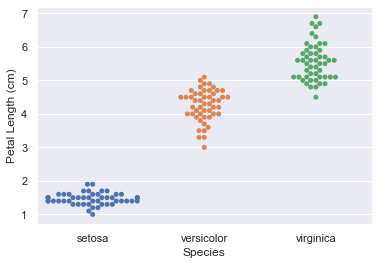

In [11]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x = 'species', y = 'petal length (cm)', data = iris_dataset)

# Label the axes
_= plt.xlabel('Species')
_= plt.ylabel('Petal Length (cm)')


# Show the plot
plt.show()


Conclusion: I. virginica petals tend to be the longest, and I. setosa petals tend to be the shortest of the three species.

The bee swarm plot has a real problem. The edges will have overlapping data points should you have a very large dataset, which was necessary in order to fit all points onto the plot. We are now obfuscating data. So, using a bee swarm plot here is not the best option. As an alternative, we can compute an empirical cumulative distribution function, or ECDF.

#### Computing the ECDF
We will write a function that takes as input a 1D array of data and then returns the x and y values of the ECDF. We will use this function over and over again. ECDFs are among the most important plots in statistical analysis. 

In [12]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1 ) / n

    return x, y

#### Plotting the ECDF
We will now use the ecdf() function to compute the ECDF for the petal lengths of Anderson's Iris versicolor flowers. Then plot the ECDF. 

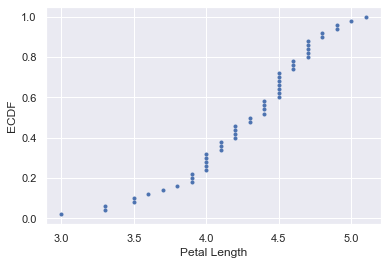

In [13]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_= plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')


# Label the axes
_= plt.xlabel('Petal Length')
_= plt.ylabel('ECDF')


# Display the plot
plt.show()

#### Comparison of ECDFs
ECDFs also allow you to compare two or more distributions (though plots get cluttered if you have too many). Here, you will plot ECDFs for the petal lengths of all three iris species

In [14]:
# setosa = iris_dataset['species'] == 'setosa'
# setosa_petal_length = iris_dataset[setosa]['petal length (cm)']

In [15]:
# setosa_petal_length = np.array(setosa_petal_length)
# setosa_petal_length

Since we will be using the petal lengths of the various species in the dataset, let's define a function to do just that and return the values in a numpy array

In [16]:
def extract_petal_length(df, flower, name_of_col = 'species'):
    column_selection = df['species'] == flower
    species_petal_length = df[column_selection]['petal length (cm)']
    return np.array(species_petal_length)

In [17]:
setosa_petal_length = extract_petal_length(iris_dataset, 'setosa')

In [18]:
setosa_petal_length

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [19]:
versicolor_petal_length = extract_petal_length(iris_dataset, 'versicolor')

In [20]:
virginica_petal_length = extract_petal_length(iris_dataset, 'virginica')

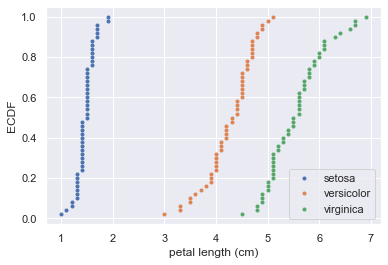

In [21]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_= plt.plot(x_set, y_set, marker = '.', linestyle = 'none')
_= plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_= plt.plot(x_virg, y_virg, marker = '.', linestyle = 'none')
 
# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

Computing means
The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using np.mean().

In [22]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


##### computing percentiles

In [23]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)


[3.3    4.     4.35   4.6    4.9775]


#### Comparing percentiles to ECDF


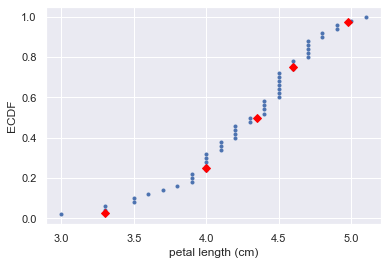

In [24]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle = 'none')

# Show the plot
plt.show()



##### Box-and-whisker plot
Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine.

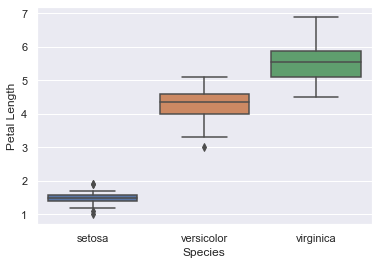

In [25]:
# Create box plot with Seaborn's default settings
_= sns.boxplot(x ='species', y = 'petal length (cm)', data = iris_dataset)

# Label the axes
_= plt.xlabel('Species')
_= plt.ylabel('Petal Length')


# Show the plot
plt.show()


#### Computing the variance


In [26]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences ** 2


# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)


# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)


# Print the results
print(variance_explicit, variance_np)


0.21640000000000004 0.21640000000000004


#### The standard deviation and the variance
The standard deviation is the square root of the variance.

In [27]:
def extract_petal_width(df, flower, name_of_col = 'species'):
    column_selection = df['species'] == flower
    species_petal_length = df[column_selection]['petal width (cm)']
    return np.array(species_petal_length)

In [28]:
versicolor_petal_width = extract_petal_width(iris_dataset, 'versicolor')

#### Scatter plots
When we made bee swarm plots, box plots, and ECDF plots, we compared the petal lengths of different species of iris. But what if we want to compare two properties of a single species? This is exactly what we will do. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

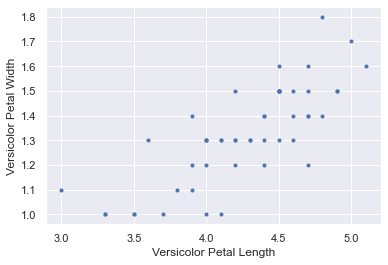

In [29]:
# Make a scatter plot
_= plt.plot(versicolor_petal_length, versicolor_petal_width, marker = '.',  linestyle = 'none')

# Label the axes
_= plt.xlabel('Versicolor Petal Length')
_= plt.ylabel('Versicolor Petal Width')

# Show the result
plt.show()

#### Computing the covariance
The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

In [30]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)



[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


#### Computing the Pearson correlation coefficient
the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the np.corrcoef() function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 and the value we are after is entry [0,1].

We will write a function, pearson_r(x, y) that takes in two arrays and returns the Pearson correlation coefficient.  We will then use this function to compute it for the petal lengths and widths of I. versicolor.


In [31]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


Statistical inference involves taking your data to probabilistic conclusions about what you would expect if you took even more data, and you can make decisions based on these conclusions.

### Random Number Generators and Hacker Statistics

The basic idea is that instead of literally repeating the data acquisition over and over again, we can simulate those repeated measurements using Python. For our first simulation, we will take a cue from our forebears. The concepts of probability originated from studies of games of chance by Pascal and others in the 17th century, so we will simulate
coin flips. Specifically, we will simulate the outcome of 4 successive coin flips. Our goal is to compute the probability that we will get four heads out of four flips. Numpy's random module, a suite of functions based on pseudorandom number generation, will be your main engine for doing this. To simulate a coin flip, we will use the function np dot random dot random, which draws a number between zero and one such that all numbers in this interval are equally likely to occur. If the number we draw is less than point-5, which has a 50% chance of happening, we say we got heads, and we get tails otherwise. This type of experiment, where the result is either True (heads) or False (tails) is referred to as a Bernoulli trial. The pseudorandom number generator works by starting with an integer, called a seed, and then generates random numbers in succession. The same seed gives the same sequence of random numbers, hence the name, "psuedorandom number generation". So, if you want to have reproducible code, it is a good idea to seed the random number generator using the np dot random dot seed function.Now, to do our coin flips, we import NumPy, seed the random number generator, and then draw four random numbers. Conveniently, we can specify how many random numbers we want with the size keyword argument. We can compute the number of heads by summing the array of Booleans because in numerical contexts, Python treats True at one and False as zero. We want to know the probability of getting four heads if we were to repeat the four flips over and over again. We can do this with a for loop. We first initialize the count to zero. We then do 10,000 repeats of the four-flip trials. If a given trial had four heads, we increase the count. So, what is the probability of getting all four heads? It's the number of times we got all heads, divided by the total number of trials we did. The result is about point-06. Pascal and his friends did not have computers and worked out problems like these with pen and paper. While this particular problem is tractable, pen-and-paper statistics can get hard fast.

In [32]:
np.random.seed(42)
n_all_heads = 0 #Initialize number of 4 -heads trials
for _ in range(10000):
    heads = np.random.random(size = 4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1
n_all_heads/10000

0.0618

In [33]:
n_all_heads

618

#### Generating random numbers using np.random

We will generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

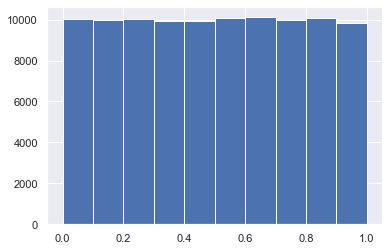

In [34]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

#### Bernoulli Trials

You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability  of landing heads (success) and probability  of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, we will use the np.random.random() function, which returns a random number between zero and one.

In [35]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()


        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

### How many defaults might we expect?
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

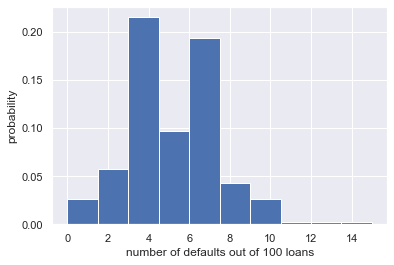

In [36]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
_= plt.hist(n_defaults, density = True)
_= plt.xlabel('number of defaults out of 100 loans')
_= plt.ylabel('probability')

# Show the plot
plt.show()

##### Will the bank fail?
Plot the number of defaults you got from the cell as a CDF usine the ecdf() function we wrote earlier.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

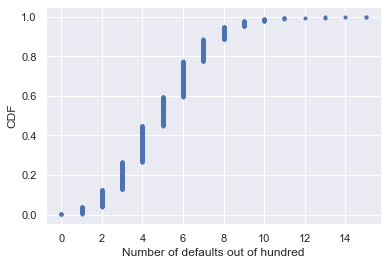

Probability of losing money = 0.022


In [37]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_= plt.plot(x, y, marker = '.', linestyle = 'none')
_= plt.xlabel('Number of defaults out of hundred')
_= plt.ylabel('CDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


As we might expect, we most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

#### Sampling out of the Binomial distribution
Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial(). This is identical to the calculation you did in the last set of exercises using your custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

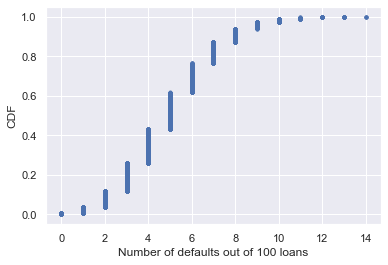

In [38]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n = 100, p = 0.05, size = 10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_= plt.plot(x, y, marker = '.', linestyle = 'none')
_= plt.xlabel('Number of defaults out of 100 loans')
_= plt.ylabel('CDF')
plt.show()

#### Plotting the Binomial PMF

we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to plt.hist() via the bins keyword argument. We want the bins centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5. You can generate an array like this using np.arange() and then subtracting 0.5 from the array.

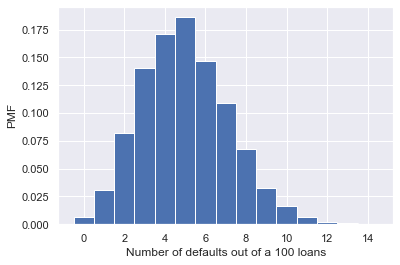

In [39]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_= plt.hist(n_defaults, bins = bins, density = True)


# Label axes
_= plt.xlabel('Number of defaults out of a 100 loans')
_= plt.ylabel('PMF')
_= plt.show()

#### Poisson processes and the Poisson distribution
In his great book on information theory, statistical inference, and machine learning, David MacKay described a town called Poissonville where the buses have a very erratic schedule. If you stand at a bus stop in Poissonville, the amount of time you have to wait for a bus is completely independent of when the previous bus arrived. In other words, you would watch a bus drive off and another one will arrive almost instantly, or you could be waiting for hours. Arrival of buses in Poissonville is what we call a Poisson process. The timing of the next event is completely independent of when the previous event happened. Many real-life processes behave in this way. For example, natural births in a given hospital are a Poisson process. There is a well-defined average number of natural births per year, and the timing of one birth is independent of the timing of the previous one. Another example is hits on a website. The timing of the next hit is independent of the timing of the last. There are countless other examples. Any process that matches the buses in Poissonville story is a Poisson process. The number of arrivals of a Poisson process in a given amount of time is Poisson distributed. The Poisson distribution has one parameter, the average number of arrivals in a given length of time. So, to match the story, we could consider the number of hits on a website in an hour with an average of six hits per hour. This is Poisson distributed. Let's take a look at the PMF for this example. For a given hour, we are most likely to get 6 hits, which is the average, but we may get more than ten, or possibly none. You might notice that this looks an awful lot like the Binomial PMF we looked at in the last video. This is because the Poisson distribution is a limit of the Binomial distribution for low probability of success and large number of trials, ie for rare events. To sample from the Poisson distribution, we use np dot random dot poisson. It also has the size keyword argument to allow multiple samples. Let's use this function to generate the Poisson CDF. After that it is the usual procedure of computing the ECDF, plotting it, and labeling axes. The result, predictably, looks like the Binomial CDF.


#### Relationship between Binomial and Poisson distributions

Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story in Poissonville, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to  approximates a Binomial distribution for  Bernoulli trials with probability  of success (with  large and  small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters  and  such that .

In [40]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size = 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size = 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.0145 3.1713545607516043
n = 20 Binom: 10.0592 2.23523944131272
n = 100 Binom: 10.0441 2.9942536949964675
n = 1000 Binom: 10.0129 3.139639085946026


#### How many no-hitters in a season?
In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

###### When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in our case the mean number of no-hitters per season.

#### Was 2015 anomalous?
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [41]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size = 10000)


# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0072


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.

 ### Probability Density Functions
 
So far, we have talked about probabilities of discrete quantities, such as die rolls and number of bus arrivals, but what about continuous quantities? A continuous quantity can take on any value, not just discrete ones. For example, the speed of a train can be 45-point-76 km/h. Continuous variables also have probability distributions. Let's consider an example. In 1879, Albert Michelson performed 100 measurements of the speed of light in air. Each measurement has some error in it; conditions, such as temperature, humidity, alignment of his optics, et cetera, change from measurement to measurement. As a result, any fractional value of the measured speed of light is possible, so it is apt to describe the results with a continuous probability distribution. In looking at Michelson's numbers, shown here in units of megameters/s, or 1000s of kilometers/s, we see this is indeed the case. What probability distribution describes these data? I posit that these data follow the famous Normal distribution. To understand what the Normal distribution is, let's consider its probability density function, or PDF. This is the continuous analog to the probability mass function, the PMF. It describes the chances of observing a value of a continuous variable. The probability of observing a single value of the speed of light does not make sense, because there is an infinity of numbers, say between 299-point-6 and 300-point-0 megameters per second. Instead, areas under the PDF give probabilities. So, the probability of measuring that the speed of light is greater than 300,000 km/s is an area under the normal curve. Parametrizing the PDF based on Michelson's experiments, this is about a 3% chance, since the pink region is about 3% of the total area under the PDF. To do this calculation, we were really just looking at the cumulative distribution function, or CDF, of the Normal distribution. Here is the CDF of the Normal distribution. Remember that the CDF gives the probability the measured speed of light will be less than the value on the x-axis. So, reading off the value at 300,000 km/s,we see that there is a 97% chance that a speed of light measurement is less than that. So, there is about a 3% change it is greater.

#### The Normal PDF
you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, you will plot a Normal PDF for various values of the variance.

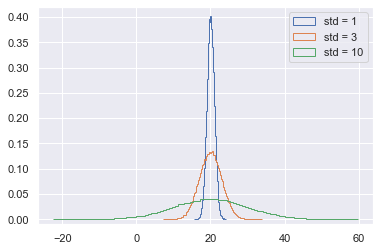

In [42]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size = 100000)
samples_std3 = np.random.normal(20, 3, size = 100000)
samples_std10 = np.random.normal(20, 10, size = 100000)

# Make histograms
_= plt.hist(samples_std1, bins = 100, density = True, histtype = 'step')
_= plt.hist(samples_std3, bins = 100, density = True, histtype = 'step')
_= plt.hist(samples_std10, bins = 100, density = True, histtype = 'step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


You can see how the different standard deviations result in PDFs of different widths. The peaks are all centered at the mean of 20.

Now that you have a feel for how the Normal PDF looks, let's consider its CDF. 

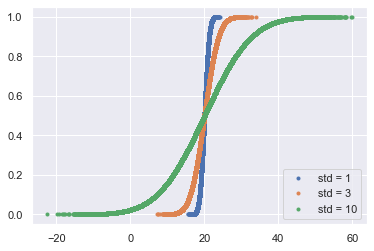

In [43]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_= plt.plot(x_std1, y_std1, marker = '.', linestyle = 'none')
_= plt.plot(x_std3, y_std3, marker = '.', linestyle = 'none')
_= plt.plot(x_std10, y_std10, marker = '.', linestyle = 'none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

#### The Normal distribution: Properties and warnings
It is often also called the Gaussian distribution, after its inventor, so you will often hear it referred to this way. So, yes, the Normal distribution is very important and very widely used. It is so prevalent, it is worth talking about some more. In practice, it is used to describe most symmetric peaked data you will encounter. Furthermore, for many of the statistical procedures you have heard of, Normality assumptions about the data are present. Indeed, it is a very powerful distribution that seems to be ubiquitous in nature, not just in the field of statistics. That said, there are important caveats about the distribution and we need to be careful when using it. First off, often times things you may think are Normally distributed are not. Consider for example large mouth bass in Massachusetts lakes measured in 1994 and 1995 by the Massachusetts Department of Environmental Protection. If we look at a histogram of the length of the 316 fish they measured, they appear to be Normally distributed. Indeed, when we look at the ECDF overlayed with a theoretical Normal CDF, the measurements look close to Normally distributed. There are some systematic differences, though, especially on the left tail. So this is not quite a Normal distribution, but we might not be making too big of an error by treating it as so. Now, let's consider the mass of the bass. One might think that since the length of these bass is close to Normally distributed, the mass should be also. When we overlay the theoretical Normal CDF on the ECDF of the data, it is not even close. Seeing this immediately shows us that our initial thought was incorrect. Another important issue to keep in mind when using the Normal distribution is the lightness of its tails. If we look at the Normal distribution, the probability of being more than four standard deviations from the mean is very small. This means that when you are modeling data as Normally distributed, outliers are extremely unlikely. Real data sets often have extreme values, and when this happens, the Normal distribution might not be the best description of your data. 

#### Are the Belmont Stakes results Normally distributed?
Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

In [44]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

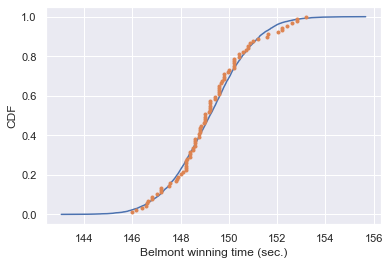

In [45]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)


# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x, y = ecdf(belmont_no_outliers)
x_theor, y_theor = ecdf(samples)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

#### What are the chances of a horse matching or beating Secretariat's record?
Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [46]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144)/1000000


# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000599


We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.

#### The Exponential Distribution
Just as there are many named discrete distribution, there are many named continuous distributions as well. For example, let's take a another trip to Poissonville and stand at a bus stop. We know that the number of buses that will arrive per hour are Poisson distributed. But the amount of time between arrivals of buses is Exponentially distributed. The Exponential distribution has this story: the waiting time between arrivals of a Poisson process are exponentially distributed. It has a single parameter, the mean waiting time. This distribution is not peaked, as we can see from its PDF. As an example, As an example, we can look at the time between all incidents involving nuclear power since 1974. We might expect incidents to be well-modeled by a Poisson process, ie, the timing of one incident is independent of all others. So, the time between incidents should be Exponentially distributed. We can compute and plot the CDF we would expect based on the mean time between incidents and overlay that with the ECDF from the real data. We take our usual approach where we draw many samples out of the Exponential distribution, using the mean inter-incident time as the parameter. We make the plot and label the axes. We see that it is close to being Exponentially distributed, indicating the nuclear incidents can indeed be modeled as a Poisson process. The Exponential and Normal are just two of many examples of continuous distributions. Importantly, in many cases you can just simulate your story to get the CDF. Remember, you have the power of a computer. If you can simulate a story, you can get its distribution!

#### If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

In [47]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

#### Distribution of no-hitters and cycles
Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

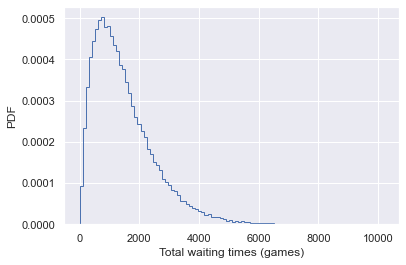

In [48]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100000)

# Make the histogram
_= plt.hist(waiting_times, histtype = 'step', density = True, bins = 100)

# Label axes
_= plt.xlabel('Total waiting times (games)')
_= plt.ylabel('PDF')

# Show the plot
plt.show()